In [35]:
# Mike CSE 5544

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
import mplleaflet
import vincent

# enable the notebook to show the graph for vincent
vincent.core.initialize_notebook()

In [86]:
ohio_counties = gpd.read_file("Ohio_Counties.shx")

In [87]:
ohio_counties.head()

,geometry
0,"POLYGON ((-84.39954710435259 41.7058604309323,..."
1,"POLYGON ((-84.82015899999999 39.227225, -84.82..."
2,"(POLYGON ((-83.110613 41.737752, -83.110148999..."
3,"(POLYGON ((-82.742311 41.496527, -82.739933999..."
4,"POLYGON ((-81.97086399999999 41.375376, -81.97..."


In [88]:
f, ax = plt.subplots(1, figsize=(9, 8))
ax = ohio_counties.plot(ax=ax, cmap='Blues', linewidth=1)
ax.set_title("Ohio Counties")
ax.set_axis_off()
mplleaflet.display(fig=ax.figure)

In [89]:
# read the data from csv file
obesity_status = pd.read_csv("Ohio_Obesity.csv")

In [90]:
obesity_status.head()

,County,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,index
0,Adams County,25.4,26.1,28.1,29.3,29.6,31.2,30.7,29.6,28.3,31.1,0
1,Allen County,26.2,26.4,29.4,31.1,32.5,36.8,37.3,36.8,33.8,35.4,1
2,Ashland County,24.8,24.9,27.0,28.7,29.2,30.4,30.7,30.0,30.1,27.9,2
3,Ashtabula County,24.7,24.6,27.2,29.5,30.5,31.0,30.0,32.0,30.7,33.5,3
4,Athens County,24.8,26.3,28.5,29.4,30.9,32.0,33.1,29.9,28.8,28.3,4


In [91]:
obesity_2004 = pd.merge(ohio_counties,obesity_status[['County', '2004', 'index']],
                 how='left', left_index = True, right_on='index')

In [92]:
obesity_2004.head()

,geometry,County,2004,index
0,"POLYGON ((-84.39954710435259 41.7058604309323,...",Adams County,25.4,0
1,"POLYGON ((-84.82015899999999 39.227225, -84.82...",Allen County,26.2,1
2,"(POLYGON ((-83.110613 41.737752, -83.110148999...",Ashland County,24.8,2
3,"(POLYGON ((-82.742311 41.496527, -82.739933999...",Ashtabula County,24.7,3
4,"POLYGON ((-81.97086399999999 41.375376, -81.97...",Athens County,24.8,4


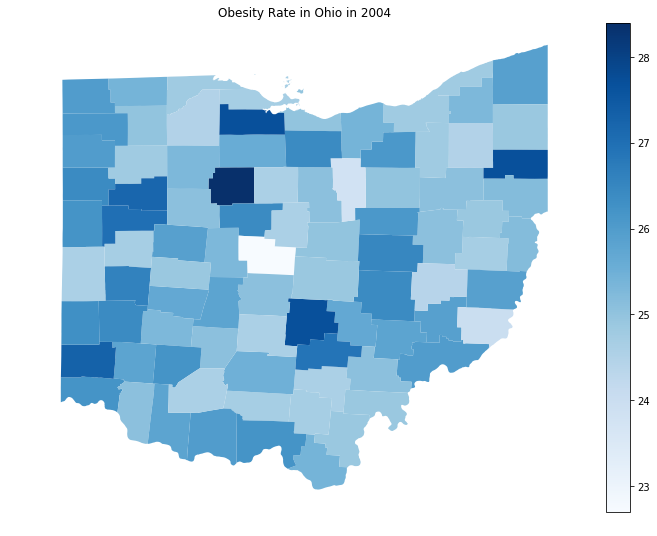

In [93]:
f, ax = plt.subplots(1, figsize=(12, 9))
ax = obesity_2004.plot(column='2004',
                 ax=ax, linewidth=0, cmap='Blues', legend=True, k=8 )
ax.set_title("Obesity Rate in Ohio in 2004")
ax.set_axis_off()
plt.show()

In [41]:
obesity_change = pd.read_csv("Columbus_Obesity.csv")

group = vincent.GroupedBar(obesity_change, iter_idx='County', width = 20, height = 160)
group.legend(title='Categories')
group.colors(brew='Spectral')
group.width=750
group.display()

In [42]:
obesity_df = pd.read_csv("Columbus_Obesity_transpose.csv")

In [43]:
obesity_df.head(10)

,Year,Delaware,Fairfield,Franklin,Hocking,Licking,Madison,Morrow,Perry,Pickaway,Union
0,2004,24.0,26.2,24.7,26.4,26.1,25.1,25.1,25.6,25.9,25.9
1,2005,25.4,26.4,25.0,26.4,25.7,25.2,25.5,26.3,25.6,26.4
2,2006,26.6,29.7,26.7,28.6,28.0,27.2,28.2,28.0,28.2,28.5
3,2007,27.1,30.4,30.2,30.3,30.1,28.7,29.8,28.8,30.4,30.1
4,2008,26.9,30.7,30.9,31.3,30.2,29.4,29.9,30.4,30.9,31.7
5,2009,25.9,31.1,30.9,34.5,32.3,31.4,30.3,33.6,33.6,34.4
6,2010,25.5,30.9,30.3,31.8,30.4,30.7,30.9,36.7,33.0,34.2
7,2011,26.5,30.6,29.5,30.5,30.9,31.2,33.8,36.2,34.9,33.6
8,2012,27.1,31.1,29.2,34.0,29.3,28.6,36.9,35.5,35.9,32.2
9,2013,28.1,32.6,29.7,37.5,31.4,29.6,36.9,36.3,34.0,34.2


In [44]:
obesity_df.columns = obesity_df.columns.str.strip()

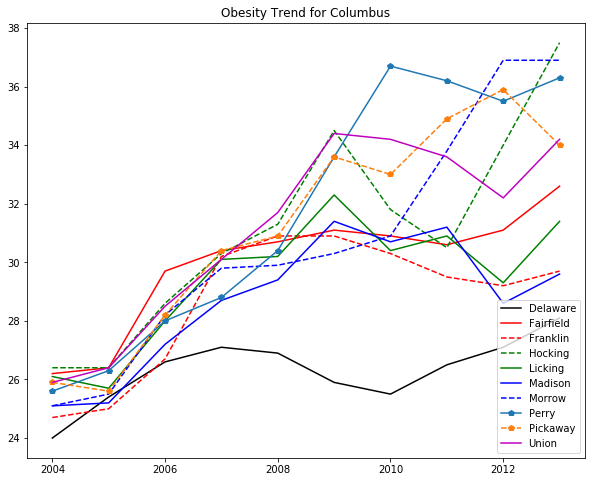

In [45]:
# plot trending plot for random 6 counties
plt.figure(figsize=(10,8))
plt.plot(obesity_df.Year,obesity_df['Delaware'], 'k-', label='Delaware')
plt.plot(obesity_df.Year,obesity_df['Fairfield'], 'r-', label='Fairfield')
plt.plot(obesity_df.Year,obesity_df['Franklin'], 'r--', label='Franklin')
plt.plot(obesity_df.Year,obesity_df['Hocking'], 'g--', label='Hocking')
plt.plot(obesity_df.Year,obesity_df['Licking'], 'g-', label='Licking')
plt.plot(obesity_df.Year,obesity_df['Madison'], 'b-', label='Madison')
plt.plot(obesity_df.Year,obesity_df['Morrow'], 'b--', label='Morrow')
plt.plot(obesity_df.Year,obesity_df['Perry'], 'p-', label='Perry')
plt.plot(obesity_df.Year,obesity_df['Pickaway'], 'p--', label='Pickaway')
plt.plot(obesity_df.Year,obesity_df['Union'], 'm-', label='Union')

plt.title('Obesity Trend for Columbus')
plt.legend(loc='lower right')


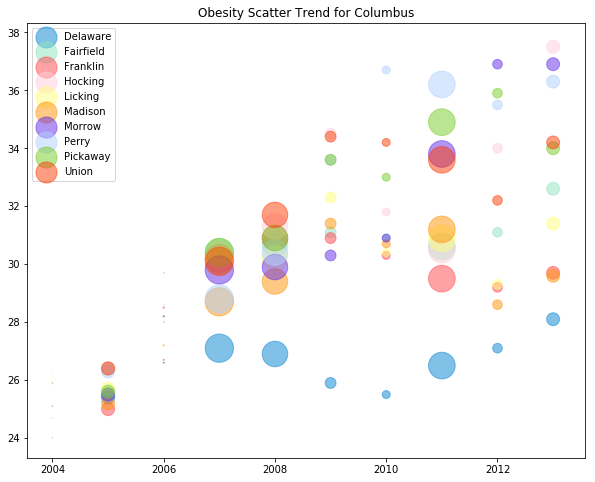

In [53]:
import numpy as np
plt.figure(figsize=(10,8))

colors = np.random.rand(10)
area = (30 * np.random.rand(30))**2  # 0 to 15 point radii

plt.scatter(obesity_df.Year,obesity_df['Delaware'], s=area, c='#0485d1', alpha=0.5)
plt.scatter(obesity_df.Year,obesity_df['Fairfield'], s=area, c='#90e4c1', alpha=0.5)
plt.scatter(obesity_df.Year,obesity_df['Franklin'],  s=area, c='#ff474c', alpha=0.5)
plt.scatter(obesity_df.Year,obesity_df['Hocking'],  s=area, c='#ffcfdc', alpha=0.5)
plt.scatter(obesity_df.Year,obesity_df['Licking'],  s=area, c='#fffe7a', alpha=0.5)
plt.scatter(obesity_df.Year,obesity_df['Madison'],  s=area, c='#ff9408', alpha=0.5)
plt.scatter(obesity_df.Year,obesity_df['Morrow'],  s=area, c='#632de9', alpha=0.5)
plt.scatter(obesity_df.Year,obesity_df['Perry'],  s=area, c='#b1d1fc', alpha=0.5)
plt.scatter(obesity_df.Year,obesity_df['Pickaway'],  s=area, c='#76cd26', alpha=0.5)
plt.scatter(obesity_df.Year,obesity_df['Union'], s=area, c='#fd3c06', alpha=0.5)

plt.title('Obesity Scatter Trend for Columbus')
plt.legend(loc='upper left')
plt.show()